# Bias-Variance Trade-Off - Lab

## Introduction

In this lab, you'll practice your knowledge on the bias-variance trade-off!

## Objectives

You will be able to: 
- Look at an example where Polynomial regression leads to overfitting
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Let's get started!

We'll try to predict some movie revenues based on certain factors, such as ratings and movie year.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


In [2]:
# Only keep four predictors and transform the with MinMaxScaler

scale = MinMaxScaler()
df = df[[ "domgross", "budget", "imdbRating", "Metascore", "imdbVotes"]]
transformed = scale.fit_transform(df)
pd_df = pd.DataFrame(transformed, columns = df.columns)
pd_df.head()

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,domgross,budget,imdbRating,Metascore,imdbVotes
0,0.055325,0.034169,0.839506,0.500000,0.384192
1,0.023779,0.182956,0.000000,0.000000,0.000000
2,0.125847,0.066059,1.000000,1.000000,1.000000
3,0.183719,0.252847,0.827160,0.572917,0.323196
4,0.233625,0.157175,0.925926,0.645833,0.137984


## Split the data into a test and train set

In [3]:
# domgross is the outcome variable
x = pd_df.drop(["domgross"], axis = 1)
y = pd_df.domgross
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y)
xtrain[:5]

,budget,imdbRating,Metascore,imdbVotes
10,0.157175,0.901235,0.937500,0.741156
20,0.476082,0.000000,0.000000,0.000000
18,0.000000,0.814815,0.687500,0.388722
14,0.225513,0.962963,0.864583,0.685073
9,0.567198,0.604938,0.343750,0.324385


In [4]:
#Your code here

## Fit a regression model to the training data and look at the coefficients

In [5]:
from sklearn.linear_model import LinearRegression
#Your code 
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
reg.coef_

array([ 0.45810412, -0.27668684,  0.30578349,  0.33466632])

## Plot the training predictions against the actual data (y_hat_train vs. y_train)

Let's plot our result for the train data. Because we have multiple predictors, we can not simply plot the income variable X on the x-axis and target y on the y-axis. Lets plot 
- a line showing the diagonal of y_train. The actual y_train values are on this line
- next, make a scatter plot that takes the actual y_train on the x-axis and the predictions using the model on the y-axis. You will see points scattered around the line. The horizontal distances between the points and the lines are the errors.

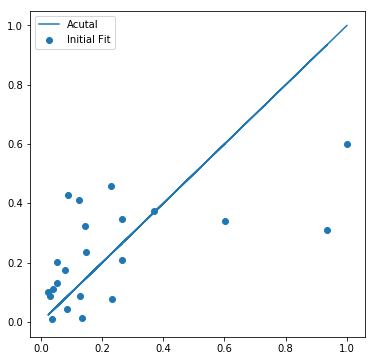

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
%store -r colors

plt.figure(figsize=(6, 6))
plt.scatter(ytrain, reg.predict(xtrain), label='Initial Fit')
plt.plot(ytrain, ytrain, label='Acutal')
plt.legend(loc='best')

## Plot the test predictions against the actual data (y_hat_test vs. y_test)

Do the same thing for the test data.

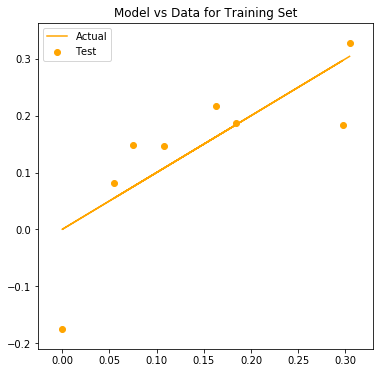

In [8]:
# your code here
plt.figure(figsize=(6,6))
plt.scatter(ytest, reg.predict(xtest), c=colors[3], label="Test")
plt.plot(ytest, ytest, label='Actual', c=colors[3])
plt.title('Model vs Data for Training Set')
plt.legend(loc='upper left')
plt.show();

## Calculate the bias
Write a formula to calculate the bias of a models predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  



In [9]:
import numpy as np
def bias(y, y_hat):
    return y_hat.mean() - y.mean()


## Calculate the variance
Write a formula to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [10]:
def variance(y_hat):
    return np.mean([i**2 for i in y_hat]) - np.mean(y_hat)**2


## Use your functions to calculate the bias and variance of your model. Do this seperately for the train and test sets.

In [11]:
# code for train set bias and variance
y_pred_train = reg.predict(xtrain)

print(variance(y_pred_train), bias(ytrain, y_pred_train))

0.025564345514066382 5.551115123125783e-17


In [12]:
# code for test set bias and variance
y_pred_test = reg.predict(xtest)

print(variance(y_pred_test), bias(ytest, y_pred_test))

0.018532607079305485 -0.008286062949809686


## Describe in words what these numbers can tell you.

# Underfit #
The variance is very low.  Think of that as a tight grouping of shots on a target, precise.
The bias is unreal.  Think of that tight group of shots on the outer ring, accurate.

In the end, accurate, but to a true bullseye that is unknown to us or simply doesn't exist.

## Overfit a new model by creating additional features by raising current features to various powers.

Use `PolynomialFeatures` with degree 3. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

$ \text{Budget} * \text{MetaScore} ^ 2 $

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape`. Quite a few!


In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)



xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.fit_transform(xtest)
# your code here
np.shape(xtrain_poly)

(22, 35)

## Plot your overfitted model's training predictions against the actual data

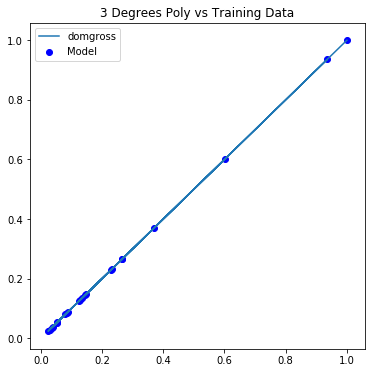

In [14]:
reg = LinearRegression()
reg.fit(xtrain_poly, ytrain)

# your code here

plt.figure(figsize=(6,6))
plt.scatter(ytrain, reg.predict(xtrain_poly.values.reshape(-1,1)), c='blue', label='Model')
plt.plot(ytrain, ytrain)
plt.title('3 Degrees Poly vs Training Data')
plt.legend()
plt.show();

Wow, we almost get a perfect fit!

## Calculate the bias and variance for the train set

In [15]:
# your code here
y_pred_train = reg.predict(xtrain_poly)

bias = bias(ytrain, y_pred_train)
var = variance(y_pred_train)
print(f"bias: {bias} \nvariance: {var}")

bias: 1.2628786905111156e-14 
variance: 0.07181066829202695


## Plot your overfitted model's test predictions against the actual data.

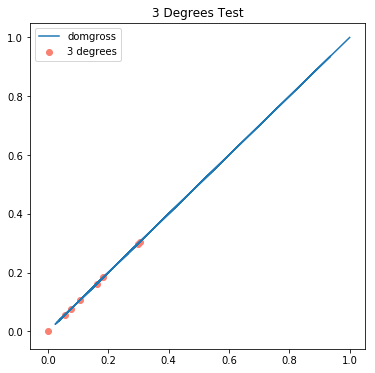

In [16]:
# your code here
reg = LinearRegression()
reg.fit(xtest_poly, ytest)

plt.figure(figsize=(6,6))
plt.scatter(ytest, reg.predict(xtest_poly), c='salmon', label='3 degrees')
plt.plot(ytrain,ytrain)
plt.title('3 Degrees Test')
plt.legend(loc='best')
plt.show();

##  Calculate the bias and variance for the train set.

In [17]:
# your code here
y_pred_test = reg.predict(xtest_poly)

bias = bias(ytest, y_pred_test)
var = variance(y_pred_test)
print(f"bias: {bias} \nvariance: {var}")

TypeError: 'numpy.float64' object is not callable

## Describe what you notice about the bias and variance statistics for your overfit model

The bias and variance for the test set both increased drastically in the overfit model.

## Level Up - Optional

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by just adding a few polynomials. Feel free to experiment and see how bias and variance improve!

## Summary

This lab gave you insight in how bias and variance change for a training and test set by using a pretty "simple" model, and a very complex model. 